In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import os
import re

In [4]:
# Especifica el directorio donde están los archivos CSV
carpeta ="../data/raw/"

# Obtén la lista de todos los archivos en la carpeta
archivos = os.listdir(carpeta)
archivos

['RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgLargeHotelNew2004_v1.3_

In [13]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)',
    'InteriorEquipment:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)
# Combine all dataframes into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True)
# # Set Date/Time as index
# combined_df.set_index('Date/Time', inplace=True)

In [14]:
dfs[0].head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,0.000733,0.0,4.589925,8.1892,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004


In [15]:
dfs[0].tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
8755,2004-12-31 20:00:00,38.653890,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8756,2004-12-31 21:00:00,38.637599,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8757,2004-12-31 22:00:00,38.577471,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8758,2004-12-31 23:00:00,38.458116,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8759,NaT,39.254839,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004


In [16]:
# dfs[0].resample("D").sum().head()

In [17]:
dfs[10]["Electricity:Facility [kW](Hourly)"].resample("D").sum().plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

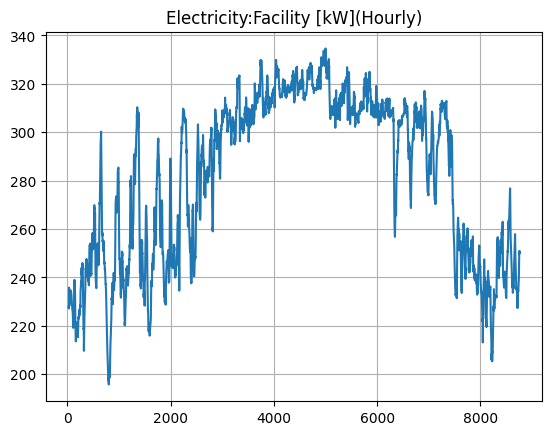

In [18]:
window_size=24
window_sized=dfs[10]["Electricity:Facility [kW](Hourly)"].copy().rolling(window=window_size)
df_smoothed=window_sized.mean()
df_smoothed.plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

In [19]:
# combined_df.to_csv("combined_pdfs.csv")

## preparar caracteristicas

* Escala uniforme para clustering: Al normalizar antes, todas las estadísticas calculadas estarán basadas en datos en la misma escala. Esto es importante para el clustering, ya que garantiza que ninguna característica domine debido a su escala original.

* Comparabilidad: Las estadísticas obtenidas estarán en una escala comparable, facilitando la interpretación relativa entre diferentes tipos de edificios.

* Pérdida de interpretabilidad: Las estadísticas calculadas no estarán en las unidades originales, lo que puede dificultar la interpretación directa de los resultados en términos reales (por ejemplo, kW). 

## Estadisticas en general 

In [20]:
# Normalizar las columnas seleccionadas
scaler = StandardScaler()
combined_df[columns_to_keep[1:]] = scaler.fit_transform(combined_df[columns_to_keep[1:]])

# Calcular estadísticas descriptivas a partir de los datos normalizados
resultados = []
for file in archivos:
    df = combined_df[combined_df['type_building'] == file.split('_')[0]]
    stats = {'type_building': df['type_building'].iloc[0]}
    for column in columns_to_keep[1:]:
        stats[column + '_mean'] = df[column].mean()
        stats[column + '_std_dev'] = df[column].std()
        stats[column + '_max_value'] = df[column].max()
    
    resultados.append(stats)

df_resultados = pd.DataFrame(resultados)

In [21]:
# df_resultados.to_csv("../data/interim/estadisticas_edificios.csv",index=False)

In [22]:
df_resultados.head(20)

,type_building,Electricity:Facility [kW](Hourly)_mean,Electricity:Facility [kW](Hourly)_std_dev,Electricity:Facility [kW](Hourly)_max_value,Fans:Electricity [kW](Hourly)_mean,Fans:Electricity [kW](Hourly)_std_dev,Fans:Electricity [kW](Hourly)_max_value,Cooling:Electricity [kW](Hourly)_mean,Cooling:Electricity [kW](Hourly)_std_dev,Cooling:Electricity [kW](Hourly)_max_value,Heating:Electricity [kW](Hourly)_mean,Heating:Electricity [kW](Hourly)_std_dev,Heating:Electricity [kW](Hourly)_max_value,InteriorLights:Electricity [kW](Hourly)_mean,InteriorLights:Electricity [kW](Hourly)_std_dev,InteriorLights:Electricity [kW](Hourly)_max_value,InteriorEquipment:Electricity [kW](Hourly)_mean,InteriorEquipment:Electricity [kW](Hourly)_std_dev,InteriorEquipment:Electricity [kW](Hourly)_max_value
0,RefBldgFullServiceRestaurantNew2004,-0.507484,0.039004,-0.398512,-0.508602,0.054960,-0.483624,-0.388100,0.042352,-0.192186,-0.161499,5.551178e-17,-0.161499,-0.446549,0.039485,-0.424440,-0.411157,0.087311,-0.315985
1,RefBldgFullServiceRestaurantNew2004,-0.507484,0.039004,-0.398512,-0.508602,0.054960,-0.483624,-0.388100,0.042352,-0.192186,-0.161499,5.551178e-17,-0.161499,-0.446549,0.039485,-0.424440,-0.411157,0.087311,-0.315985
2,RefBldgFullServiceRestaurantNew2004,-0.507484,0.039004,-0.398512,-0.508602,0.054960,-0.483624,-0.388100,0.042352,-0.192186,-0.161499,5.551178e-17,-0.161499,-0.446549,0.039485,-0.424440,-0.411157,0.087311,-0.315985
3,RefBldgFullServiceRestaurantNew2004,-0.507484,0.039004,-0.398512,-0.508602,0.054960,-0.483624,-0.388100,0.042352,-0.192186,-0.161499,5.551178e-17,-0.161499,-0.446549,0.039485,-0.424440,-0.411157,0.087311,-0.315985
4,RefBldgFullServiceRestaurantNew2004,-0.507484,0.039004,-0.398512,-0.508602,0.054960,-0.483624,-0.388100,0.042352,-0.192186,-0.161499,5.551178e-17,-0.161499,-0.446549,0.039485,-0.424440,-0.411157,0.087311,-0.315985
5,RefBldgHospitalNew2004,2.649361,0.751299,4.085582,3.103546,0.435404,7.981196,2.745090,1.009670,3.924941,-0.161499,5.551178e-17,-0.161499,1.214731,1.117610,2.698025,1.853657,0.982528,3.087604
6,RefBldgHospitalNew2004,2.649361,0.751299,4.085582,3.103546,0.435404,7.981196,2.745090,1.009670,3.924941,-0.161499,5.551178e-17,-0.161499,1.214731,1.117610,2.698025,1.853657,0.982528,3.087604
7,RefBldgHospitalNew2004,2.649361,0.751299,4.085582,3.103546,0.435404,7.981196,2.745090,1.009670,3.924941,-0.161499,5.551178e-17,-0.161499,1.214731,1.117610,2.698025,1.853657,0.982528,3.087604
8,RefBldgHospitalNew2004,2.649361,0.751299,4.085582,3.103546,0.435404,7.981196,2.745090,1.009670,3.924941,-0.161499,5.551178e-17,-0.161499,1.214731,1.117610,2.698025,1.853657,0.982528,3.087604
9,RefBldgHospitalNew2004,2.649361,0.751299,4.085582,3.103546,0.435404,7.981196,2.745090,1.009670,3.924941,-0.161499,5.551178e-17,-0.161499,1.214731,1.117610,2.698025,1.853657,0.982528,3.087604


## estadisticas individuales 

In [23]:
# Lista para almacenar los resultados de las estadísticas
resultados = []

# Iterar sobre cada dataframe
for df in dfs:
    # Guardar el nombre del edificio
    type_building = df['type_building'].iloc[0]
    
    # Excluir columnas no numéricas y normalizar los datos
    scaler = StandardScaler()
    df_numeric = df.drop(columns=['Date/Time', 'type_building'])
    df_normalized = df_numeric.copy()
    df_normalized[df_numeric.columns] = scaler.fit_transform(df_numeric)
    
    # Calcular estadísticas para cada columna normalizada
    stats = {'type_building': type_building}
    for column in df_normalized.columns:
        stats[column + '_mean'] = df_normalized[column].mean()
        stats[column + '_std_dev'] = df_normalized[column].std()
        stats[column + '_max_value'] = df_normalized[column].max()
        stats[column + '_min_value'] = df_normalized[column].min()
        stats[column + '_25_percentile'] = df_normalized[column].quantile(0.25)
        stats[column + '_50_percentile'] = df_normalized[column].quantile(0.50)
        stats[column + '_75_percentile'] = df_normalized[column].quantile(0.75)
    
    # Agregar los resultados a la lista
    resultados.append(stats)

# Convertir la lista de resultados en un dataframe
df_resultados = pd.DataFrame(resultados)

In [24]:
df_resultados

,type_building,Electricity:Facility [kW](Hourly)_mean,Electricity:Facility [kW](Hourly)_std_dev,Electricity:Facility [kW](Hourly)_max_value,Electricity:Facility [kW](Hourly)_min_value,Electricity:Facility [kW](Hourly)_25_percentile,Electricity:Facility [kW](Hourly)_50_percentile,Electricity:Facility [kW](Hourly)_75_percentile,Fans:Electricity [kW](Hourly)_mean,Fans:Electricity [kW](Hourly)_std_dev,...,InteriorLights:Electricity [kW](Hourly)_25_percentile,InteriorLights:Electricity [kW](Hourly)_50_percentile,InteriorLights:Electricity [kW](Hourly)_75_percentile,InteriorEquipment:Electricity [kW](Hourly)_mean,InteriorEquipment:Electricity [kW](Hourly)_std_dev,InteriorEquipment:Electricity [kW](Hourly)_max_value,InteriorEquipment:Electricity [kW](Hourly)_min_value,InteriorEquipment:Electricity [kW](Hourly)_25_percentile,InteriorEquipment:Electricity [kW](Hourly)_50_percentile,InteriorEquipment:Electricity [kW](Hourly)_75_percentile
0,RefBldgFullServiceRestaurantNew2004,-2.563145e-16,1.000057,2.639612,-1.703158,-0.238390,0.145275,0.509894,7.092247e-16,1.000057,...,0.172292,0.559950,0.559950,2.088639e-17,1.000057,1.090050,-1.583802,-0.327648,0.058997,1.090050
1,RefBldgFullServiceRestaurantNew2004,-3.666271e-16,1.000057,2.657459,-1.690102,-0.227951,0.139232,0.546316,1.218508e-15,1.000057,...,0.172292,0.559950,0.559950,2.088639e-17,1.000057,1.090050,-1.583802,-0.327648,0.058997,1.090050
2,RefBldgFullServiceRestaurantNew2004,2.465810e-16,1.000057,2.499091,-1.671050,-0.258949,0.102182,0.579969,1.618188e-16,1.000057,...,0.172292,0.559950,0.559950,2.088639e-17,1.000057,1.090050,-1.583802,-0.327648,0.058997,1.090050
3,RefBldgFullServiceRestaurantNew2004,-7.819215e-16,1.000057,2.951855,-1.762240,-0.175795,0.231507,0.554066,-5.578490e-16,1.000057,...,0.172292,0.559950,0.559950,2.088639e-17,1.000057,1.090050,-1.583802,-0.327648,0.058997,1.090050
4,RefBldgFullServiceRestaurantNew2004,-1.849358e-16,1.000057,2.822340,-1.763207,-0.168382,0.225748,0.547494,5.951607e-16,1.000057,...,0.172292,0.559950,0.559950,2.088639e-17,1.000057,1.090050,-1.583802,-0.327648,0.058997,1.090050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,RefBldgWarehouseNew2004,1.622244e-16,1.000057,2.934936,-1.014857,-0.632478,-0.517797,1.071982,-1.687133e-16,1.000057,...,-0.646151,-0.646151,1.154366,9.530682e-17,1.000057,1.694531,-0.672664,-0.672664,-0.672664,1.398631
76,RefBldgWarehouseNew2004,1.804746e-16,1.000057,3.074529,-1.005450,-0.625526,-0.526779,1.067601,3.244487e-17,1.000057,...,-0.646151,-0.646151,1.154366,9.530682e-17,1.000057,1.694531,-0.672664,-0.672664,-0.672664,1.398631
77,RefBldgWarehouseNew2004,1.825024e-18,1.000057,3.011214,-1.006141,-0.627950,-0.529989,1.057539,-3.893385e-17,1.000057,...,-0.646151,-0.646151,1.154366,9.530682e-17,1.000057,1.694531,-0.672664,-0.672664,-0.672664,1.398631
78,RefBldgWarehouseNew2004,3.812273e-17,1.000057,2.853698,-1.023903,-0.648286,-0.516741,1.121645,-8.435667e-17,1.000057,...,-0.646151,-0.646151,1.154366,9.530682e-17,1.000057,1.694531,-0.672664,-0.672664,-0.672664,1.398631


In [25]:
df_resultados.to_csv("../data/interim/estadisticas_edificios_normalizados.csv",index=False)